# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [692]:
# Parameters
m = 1
A = 0.01#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [693]:
res=m;
N=2.0^m*500/5.0
Xf=1.0;

dx=Xf/N;
dt=0.1*round(dx,digits=10);
Nt=2.0^m*500.0/5.0
Tf=Nt*dt; #final time
print(Tf)

0.1

In [694]:
print(N)

200.0

In [695]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.005
dt =0.0005
dx/dt =10.0


In [696]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [697]:
include("./ScalarField.jl");

In [698]:
ori=0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);

initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

step size is  0.005
the time step is 0.0005


In [699]:
if m==1
    initX1=chebyshev(int((L-6)))
    L1=L;
elseif m==2
    initX1=doublegrid(chebyshev(int((L1-6))))
else
    initX1=doublegrid(doublegrid(chebyshev(int((L1-6)))))
end
initX=collect(initX)
initX[4:L-3]=initX1;

# Initial data of m β Ψ and Ψ,x

In [700]:
using Dierckx

####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.7#0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], initderpsi[4:L-3],  k=4);

In [701]:
y0=[0 0 0]
state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:])

state_array = ghost(state_array);

In [702]:
"""using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])"""

"using Plots #showing initial data and the initial status of the horizon finder\nplot(initX[4:L-3], state_array[4:L-3,1:4], xaxis=\"x\",title=\"Initial Data\", labels=[\"m\" \"beta\" \"psi\" \"psi,x\"],xlim=[0,1])"

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [703]:
"""for i in 4:L-3
    println(epsilon(initX,i,dt,dx))
end"""

"for i in 4:L-3\n    println(epsilon(initX,i,dt,dx))\nend"

In [704]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step0.csv"

In [705]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [706]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

10.0


 ## Time evolution

fixed grid

In [707]:
finaltime=1#0.005*10*5#1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

iteration 1 dt is 0.0005, time of iteration is 0.0005
iteration 2 dt is 0.0005, time of iteration is 0.001
iteration 3 dt is 0.0005, time of iteration is 0.0015
iteration 4 dt is 0.0005, time of iteration is 0.002
iteration 5 dt is 0.0005, time of iteration is 0.0025
iteration 6 dt is 0.0005, time of iteration is 0.003
iteration 7 dt is 0.0005, time of iteration is 0.0035
iteration 8 dt is 0.0005, time of iteration is 0.004
iteration 9 dt is 0.0005, time of iteration is 0.0045
iteration 10 dt is 0.0005, time of iteration is 0.005
iteration 11 dt is 0.0005, time of iteration is 0.0055
iteration 12 dt is 0.0005, time of iteration is 0.006
iteration 13 dt is 0.0005, time of iteration is 0.0065
iteration 14 dt is 0.0005, time of iteration is 0.007
iteration 15 dt is 0.0005, time of iteration is 0.0075
iteration 16 dt is 0.0005, time of iteration is 0.008
iteration 17 dt is 0.0005, time of iteration is 0.0085
iteration 18 dt is 0.0005, time of iteration is 0.009
iteration 19 dt is 0.0005, t

iteration 151 dt is 0.0005, time of iteration is 0.0755
iteration 152 dt is 0.0005, time of iteration is 0.076
iteration 153 dt is 0.0005, time of iteration is 0.0765
iteration 154 dt is 0.0005, time of iteration is 0.077
iteration 155 dt is 0.0005, time of iteration is 0.0775
iteration 156 dt is 0.0005, time of iteration is 0.078
iteration 157 dt is 0.0005, time of iteration is 0.0785
iteration 158 dt is 0.0005, time of iteration is 0.079
iteration 159 dt is 0.0005, time of iteration is 0.0795
iteration 160 dt is 0.0005, time of iteration is 0.08
iteration 161 dt is 0.0005, time of iteration is 0.0805
iteration 162 dt is 0.0005, time of iteration is 0.081
iteration 163 dt is 0.0005, time of iteration is 0.0815
iteration 164 dt is 0.0005, time of iteration is 0.082
iteration 165 dt is 0.0005, time of iteration is 0.0825
iteration 166 dt is 0.0005, time of iteration is 0.083
iteration 167 dt is 0.0005, time of iteration is 0.0835
iteration 168 dt is 0.0005, time of iteration is 0.084
it

iteration 302 dt is 0.0005, time of iteration is 0.151
iteration 303 dt is 0.0005, time of iteration is 0.1515
iteration 304 dt is 0.0005, time of iteration is 0.152
iteration 305 dt is 0.0005, time of iteration is 0.1525
iteration 306 dt is 0.0005, time of iteration is 0.153
iteration 307 dt is 0.0005, time of iteration is 0.1535
iteration 308 dt is 0.0005, time of iteration is 0.154
iteration 309 dt is 0.0005, time of iteration is 0.1545
iteration 310 dt is 0.0005, time of iteration is 0.155
iteration 311 dt is 0.0005, time of iteration is 0.1555
iteration 312 dt is 0.0005, time of iteration is 0.156
iteration 313 dt is 0.0005, time of iteration is 0.1565
iteration 314 dt is 0.0005, time of iteration is 0.157
iteration 315 dt is 0.0005, time of iteration is 0.1575
iteration 316 dt is 0.0005, time of iteration is 0.158
iteration 317 dt is 0.0005, time of iteration is 0.1585
iteration 318 dt is 0.0005, time of iteration is 0.159
iteration 319 dt is 0.0005, time of iteration is 0.1595
i

 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif")
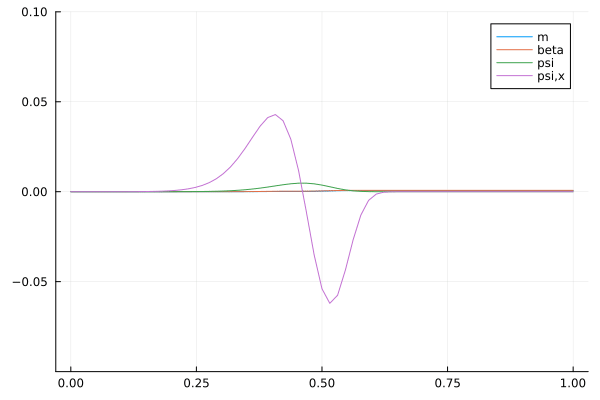

In [454]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:10:640
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.1, 0.1])#,xlim=[0.0, 0.01])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

In [432]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:290#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2/monitor_ratio10.csv" is not a valid file or doesn't exist

In [51]:
epsilon(dt,dx)

0.015625

In [31]:
state_array[:,4]

207-element Vector{Float64}:
 -2.365518250288725e-9
 -9.136367842295702e-10
 -2.14954583648039e-10
  0.0
  6.986152586784135e-13
  5.661291067212787e-11
  4.3721453478448e-10
  1.681826439904089e-9
  4.6038562839992895e-9
  1.0296050405382373e-8
  2.0137407051887777e-8
  3.5801665455811194e-8
  5.926726083699171e-8
  ⋮
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [37]:

auxinitX= range(0,1,step=dx)
println(Der(state_array,6,4,auxinitX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, auxinitX[6]))

3.017168193837207e-8
0.00017208804225226937


In [53]:
println(Der(state_array,60,4,initX))

spl= Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
println(derivative(spl, initX[60]))

println(derivative(spl, initX[60]).-Der(state_array,60,4,initX))

0.014407887381376435
0.014407810796996974
-7.658437946138352e-8


In [30]:
using Roots
find_zero(derpsi_func, (0,0.5), Bisection())

0.2713799770174635

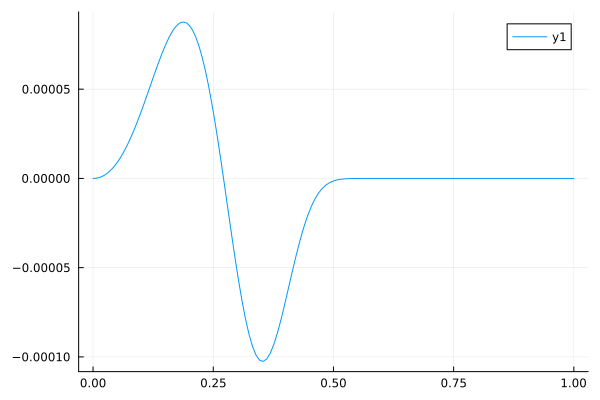

In [23]:
using Plots
plot(initX1, derpsi_func(initX1))

In [66]:
m_func = Spline1D(initX[4:L-3],state_array[4:L-3,1],k=4)
beta_func = Spline1D(initX[4:L-3],state_array[4:L-3,2],k=4)
der_funcs=[derivative(m_func,initX) derivative(beta_func,initX) derivative(derpsi_func,initX)]
der_funcs[2,1] # i is gridpoint, j is function

-1.5086563198078306e-16

In [58]:
derivative(m_func,initX)

207-element Vector{Float64}:
 -3.6298572062043756e-16
 -1.5086563198078306e-16
 -4.2846357130174216e-17
 -3.826449677788914e-18
  1.2955367671949918e-18
  7.621048595599677e-18
  5.1885306005563256e-17
  2.109734086495333e-16
  6.633715930192716e-16
  1.768094158067992e-15
  4.2032891114686175e-15
  9.186535719427543e-15
  1.882331476354324e-14
  ⋮
 -3.776355223175436e-19
 -1.7646519734465227e-20
  1.0587911840678348e-20
  2.2651714422785337e-19
 -1.4750589189488752e-19
 -3.7472920178666525e-19
  6.78866591885402e-20
 -2.96640705754548e-20
  5.421010862427541e-19
  3.1064380724396854e-18
  8.986602830812212e-18
  1.9505851304156383e-17

In [166]:
derivative(derpsi_func,initX1[1])

3.9599527939805415e-10

In [163]:
derivative(derpsi_func,initX1)[1]

3.9599527939805415e-10

In [161]:
derivative(derpsi_func,initX)[4]

3.9599527939805415e-10